In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from shapely import Polygon, affinity

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


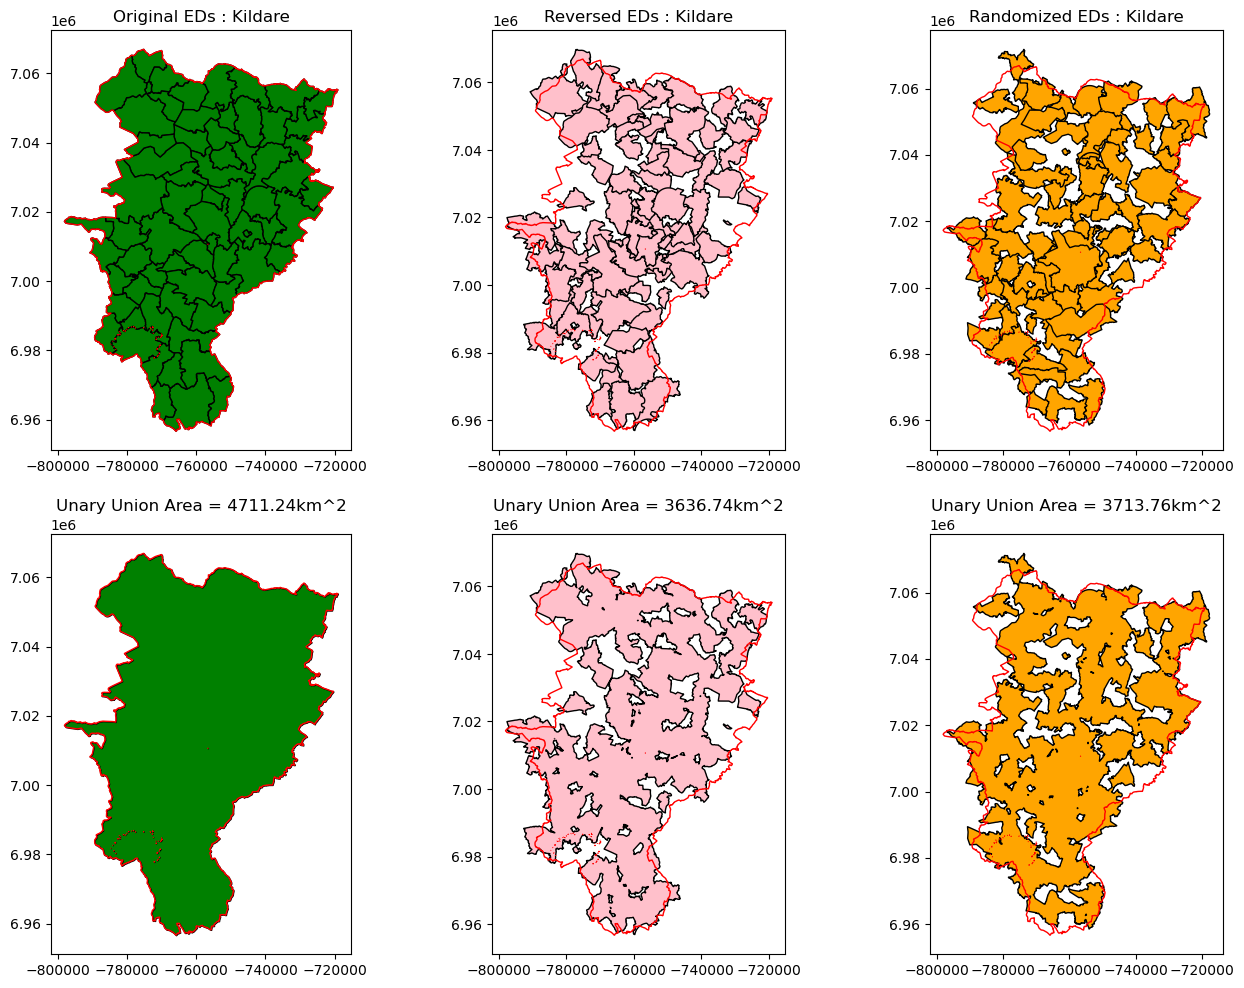

In [56]:
kildare = gpd.read_file("kildare.json").to_crs(3857)

points_reversed = gpd.GeoDataFrame(pd.DataFrame(kildare['geometry'].centroid.reset_index(drop=True), columns=['geometry']).sort_index(ascending=False).reset_index(drop=True), geometry='geometry')
points_shuffled = gpd.GeoDataFrame(pd.DataFrame(kildare['geometry'].centroid.reset_index(drop=True), columns=['geometry']).sample(len(kildare)).reset_index(drop=True), geometry='geometry')

def move_gdf(gdf_poly, gdf_p):
    gdf_new = gdf_poly.copy()
    gdf_new['delta_x'] = gdf_p['geometry'].x - gdf_new['geometry'].centroid.x
    gdf_new['delta_y'] = gdf_p['geometry'].y - gdf_new['geometry'].centroid.y
    gdf_new['geometry'] = gdf_new.apply(lambda gdf: affinity.translate(gdf.loc['geometry'], xoff=gdf.loc['delta_x'], yoff=gdf.loc['delta_y']), axis=1)
    return gdf_new[gdf_new['geometry'].geom_type != 'Point']

kildare_reversed = move_gdf(kildare, points_reversed)
kildare_shuffled = move_gdf(kildare, points_shuffled)

kildare_bounds = gpd.GeoSeries(kildare.unary_union, crs=3857)
reversed_bounds = gpd.GeoSeries(kildare_reversed.unary_union, crs=3857)
shuffled_bounds = gpd.GeoSeries(kildare_shuffled.unary_union, crs=3857)

fig, axs = plt.subplots(2,3, figsize=(16,12))
axs_flat = axs.flatten()
print(axs_flat)

# Fig titles
axs_flat[0].set_title('Original EDs : Kildare')
axs_flat[1].set_title('Reversed EDs : Kildare')
axs_flat[2].set_title('Randomized EDs : Kildare')
axs_flat[3].set_title(f'Unary Union Area = {kildare_bounds.area.item()/1000000:.2f}km^2')
axs_flat[4].set_title(f'Unary Union Area = {reversed_bounds.area.item()/1000000:.2f}km^2')
axs_flat[5].set_title(f'Unary Union Area = {shuffled_bounds.area.item()/1000000:.2f}km^2')


# ED's
kildare.plot(ax=axs_flat[0], edgecolor='black', facecolor='green')
kildare_reversed.plot(ax=axs_flat[1], edgecolor='black', facecolor='pink')
kildare_shuffled.plot(ax=axs_flat[2], edgecolor='black', facecolor='orange')

# ED Unary Union
kildare_bounds.plot(ax=axs_flat[3], edgecolor='black', facecolor='green')
reversed_bounds.plot(ax=axs_flat[4], edgecolor='black', facecolor='pink')
shuffled_bounds.plot(ax=axs_flat[5], edgecolor='black', facecolor='orange')



for ax in axs_flat:
    kildare_bounds.plot(ax=ax, edgecolor='red', facecolor='none')

/home/paddy/miniconda3/envs/radian/lib/python3.11/site-packages/geopandas/geodataframe.py:2469: UserWarning: `keep_geom_type=True` in overlay resulted in 156 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


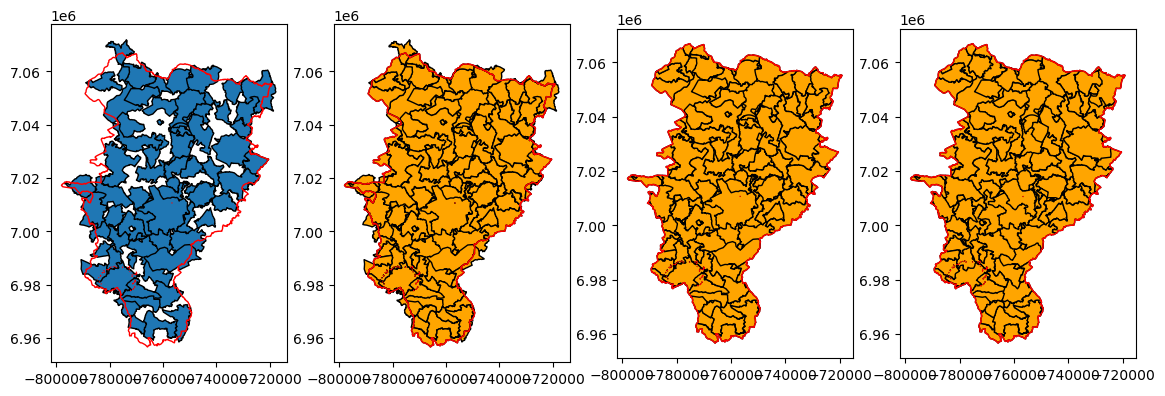

In [69]:
fig, ax = plt.subplots(1,4,figsize=(14, 12))

kildare_shuffled.plot(ax=ax[0], edgecolor='black')

overlay1 = gpd.GeoDataFrame(geometry=kildare_bounds).overlay(kildare_shuffled, how='union')
overlay2 = gpd.GeoDataFrame(geometry=kildare_bounds).overlay(overlay1, how='intersection')
overlay3 = overlay2.clip(overlay2)

overlay1.plot(ax=ax[1], edgecolor='black', facecolor='orange')
overlay2.plot(ax=ax[2], edgecolor='black', facecolor='orange')
overlay3.plot(ax=ax[3], edgecolor='black', facecolor='orange')

for x in ax:
    kildare_bounds.plot(ax=x,edgecolor='red',facecolor='none')